# linreg_interpolation
+ [Introduction to Linear Regression in Python](https://towardsdatascience.com/c12a072bedf0)
+ [Linear Interpolation in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.02-Linear-Interpolation.html)
+ [Lagrange Polynomial Interpolation in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html)

## questions

### part a (in-class)
1. Write equations of $c_0$ and $c_1$ as implementation of linear regression to  $y = c_0 + c_1 x$.
2. Write equation of linear interpolation for pairs of data $\{ (x_i, y_i) \ | \ i = 1, 2, \dots, n \}$.
3. Write equation of Lagrange polynomial interpolation for pairs of data $\{ (x_i, y_i) \ | \ i = 1, 2, \dots, n \}$.
4. Explain the difference between linear regression and interpolation for the data.

### part b (take-home)
1. Write function `linear_regression()` to calculate `c_0` and `c_1` with input parameters are `x` and `y`, where both are `list` with the same length.
2. Write functions `linear_interpol()` to calculate linear interpolation with input parameters are `x` and `y`, where both are `list` with the same length.
3. Write functions `lagrange_interpol()` to calculate Lagrange polynomial interpolation with input parameters are `x` and `y`, where both are `list` with the same length.
4. Plot curves using, directly or indirectly, the functions `linear_regression()`, `linear_interpol()`, `lagrange_interpol()`, and the data `x` and `y`. Set right label to each series and show them in the plot legend.

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell.
+ There should be **at least four cells (Code cells)**.
+ Existence of additional Markdown cells for explanation are optional.

In [1]:
#Solusi nomor 1

def linear_regression(x: list, y: list):
    N = len(x)
    sum_xx = sum([x_i**2 for x_i in x])
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum([x[i]*y[i] for i in range(N)])
    c_0 = (sum_xx*sum_y - sum_x*sum_xy)/(N*sum_xx-sum_x**2)
    c_1 = (N*sum_xy - sum_x*sum_y)/(N*sum_xx-sum_x**2) 
    return c_0, c_1

### Solusi nomor 2

Fungsi `linear_interpol` akan mengembalikan n-1 fungsi linear yang menginterpolasi titik-titik. Fungsi-fungsi linear tersebut dapat digunakan ataupun dilihat persamaannya menggunakan sympy.

In [2]:
def linear_interpol(x : list, y : list):
    N = len(x)
    f = []
    for i in range(N-1):
        f.append(lambda X, i=i: y[i] + (y[i]-y[i+1])*(x[i]-X)/(x[i+1]-x[i]))
    return f

### Solusi nomor 3

Catatan: Modul `reduce` dan `mul` digunakan untuk melakukan operasi multiplikasi tiap elemen list (untuk operasi _Pi product notation_):
$$
    q_i(x) = \Pi_{j=1, j\neq i}^n \frac{x-x_j}{x_i-x_j}
$$


In [3]:
from functools import reduce
from operator import mul

def lagrange_interpol(x: list, y : list):
    N = len(x)
    def f(X, x=x, y=y): 
        q = []
        for i in range(N):
            q.append([y[i]*reduce(mul, [(X-x[j])/(x[i]-x[j]) for j in range(N) if i != j])])
        return sum([q[i][0] for i in range(len(x))])
    return f

### Solusi nomor 4



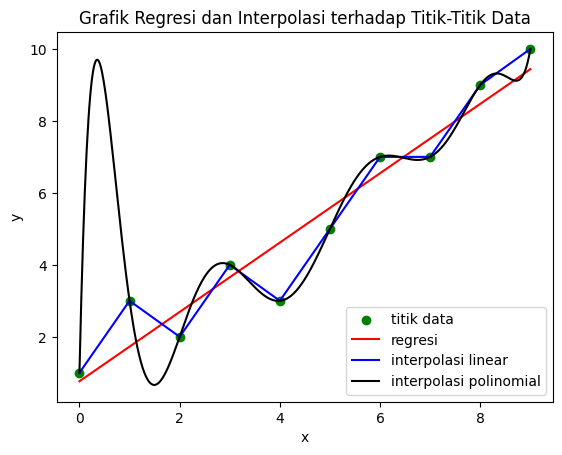

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = [val for val in range(10)]
y = [1, 3, 2, 4, 3, 5, 7, 7, 9, 10]
x_batas = np.linspace(x[0], x[-1], 500)

c_0, c_1 = linear_regression(x, y)
f_regression = lambda x: c_0 + c_1*x
f_linear_interpol = linear_interpol(x, y)
f_lagrange_interpol = lagrange_interpol(x, y)

plt.scatter(x, y, color="green", label="titik data")
plt.plot(x, [f_regression(x_i) for x_i in x], color="red", label='regresi')
y_linear_interpol = [f_linear_interpol[i](x[i]) for i in range(0, len(x)-1)]
y_linear_interpol.append(f_linear_interpol[len(x)-2](x[len(x)-1])) # Batas kanan
plt.plot(x, y_linear_interpol, color="blue", label="interpolasi linear")
plt.plot(x_batas, [f_lagrange_interpol(x_i) for x_i in x_batas], color="black", label='interpolasi polinomial')
plt.title("Grafik Regresi dan Interpolasi terhadap Titik-Titik Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

